In [1]:
import pandas as pd
import matplotlib.pyplot as plt

alcohol_sales= pd.read_csv('/content/Alcohol_Sales.csv')
miles_traveled= pd.read_csv('/content/Miles_Traveled.csv')

In [2]:
print(alcohol_sales.head())


         DATE  S4248SM144NCEN
0  1992-01-01            3459
1  1992-02-01            3458
2  1992-03-01            4002
3  1992-04-01            4564
4  1992-05-01            4221


In [3]:
print(miles_traveled.head())

         DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0


In [4]:
alcohol_sales.rename(columns={'S4248SM144NCEN':'ALCOGOL SALES'},inplace=True)
miles_traveled.rename(columns={'TRFVOLUSM227NFWA':'VEHICLE MILES TRAVELED'},inplace=True)

In [5]:
alcohol_sales.head()

DATE  ALCOGOL SALES
0  1992-01-01           3459
1  1992-02-01           3458
2  1992-03-01           4002
3  1992-04-01           4564
4  1992-05-01           4221

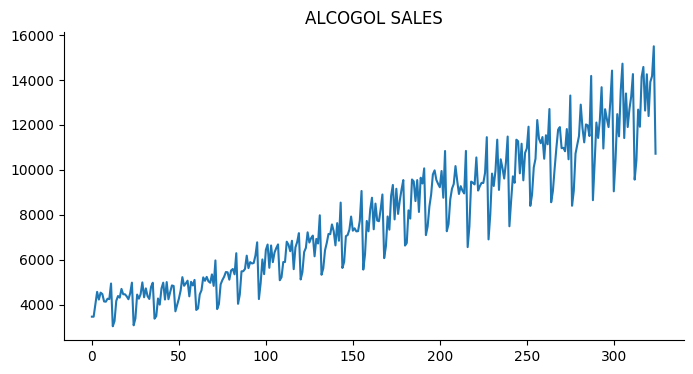

In [6]:
alcohol_sales['ALCOGOL SALES'].plot(kind='line', figsize=(8, 4), title='ALCOGOL SALES')
plt.gca().spines[['top', 'right']].set_visible(False)

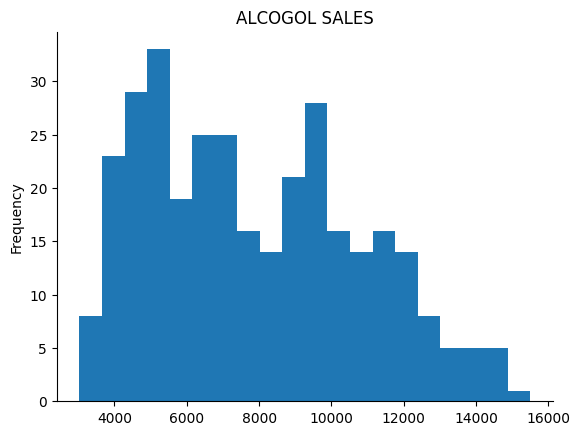

In [7]:
alcohol_sales['ALCOGOL SALES'].plot(kind='hist', bins=20, title='ALCOGOL SALES')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
miles_traveled.head()

DATE  VEHICLE MILES TRAVELED
0  1970-01-01                 80173.0
1  1970-02-01                 77442.0
2  1970-03-01                 90223.0
3  1970-04-01                 89956.0
4  1970-05-01                 97972.0

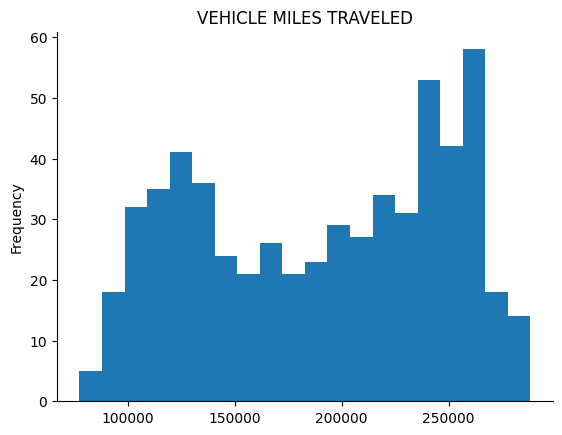

In [9]:
miles_traveled['VEHICLE MILES TRAVELED'].plot(kind='hist', bins=20, title='VEHICLE MILES TRAVELED')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
plt.figure(figsize=(100,200))
plt.plot(alcohol_sales.index,alcohol_sales['ALCOGOL SALES'],label='Alcohol Sales')
plt.plot(miles_traveled.index,miles_traveled['VEHICLE MILES TRAVELED'],label='Miles Traveled')
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [11]:
plt.figure(figsize=(100,200))
plt.plot(alcohol_sales.index,alcohol_sales['ALCOGOL SALES'],label='Alcohol Sales')
plt.plot(miles_traveled.index,miles_traveled['VEHICLE MILES TRAVELED'],label='Miles Traveled')
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [12]:
df=pd.merge(alcohol_sales,miles_traveled,left_index=True,right_index=True)
df=df.iloc[:,[1,3]]

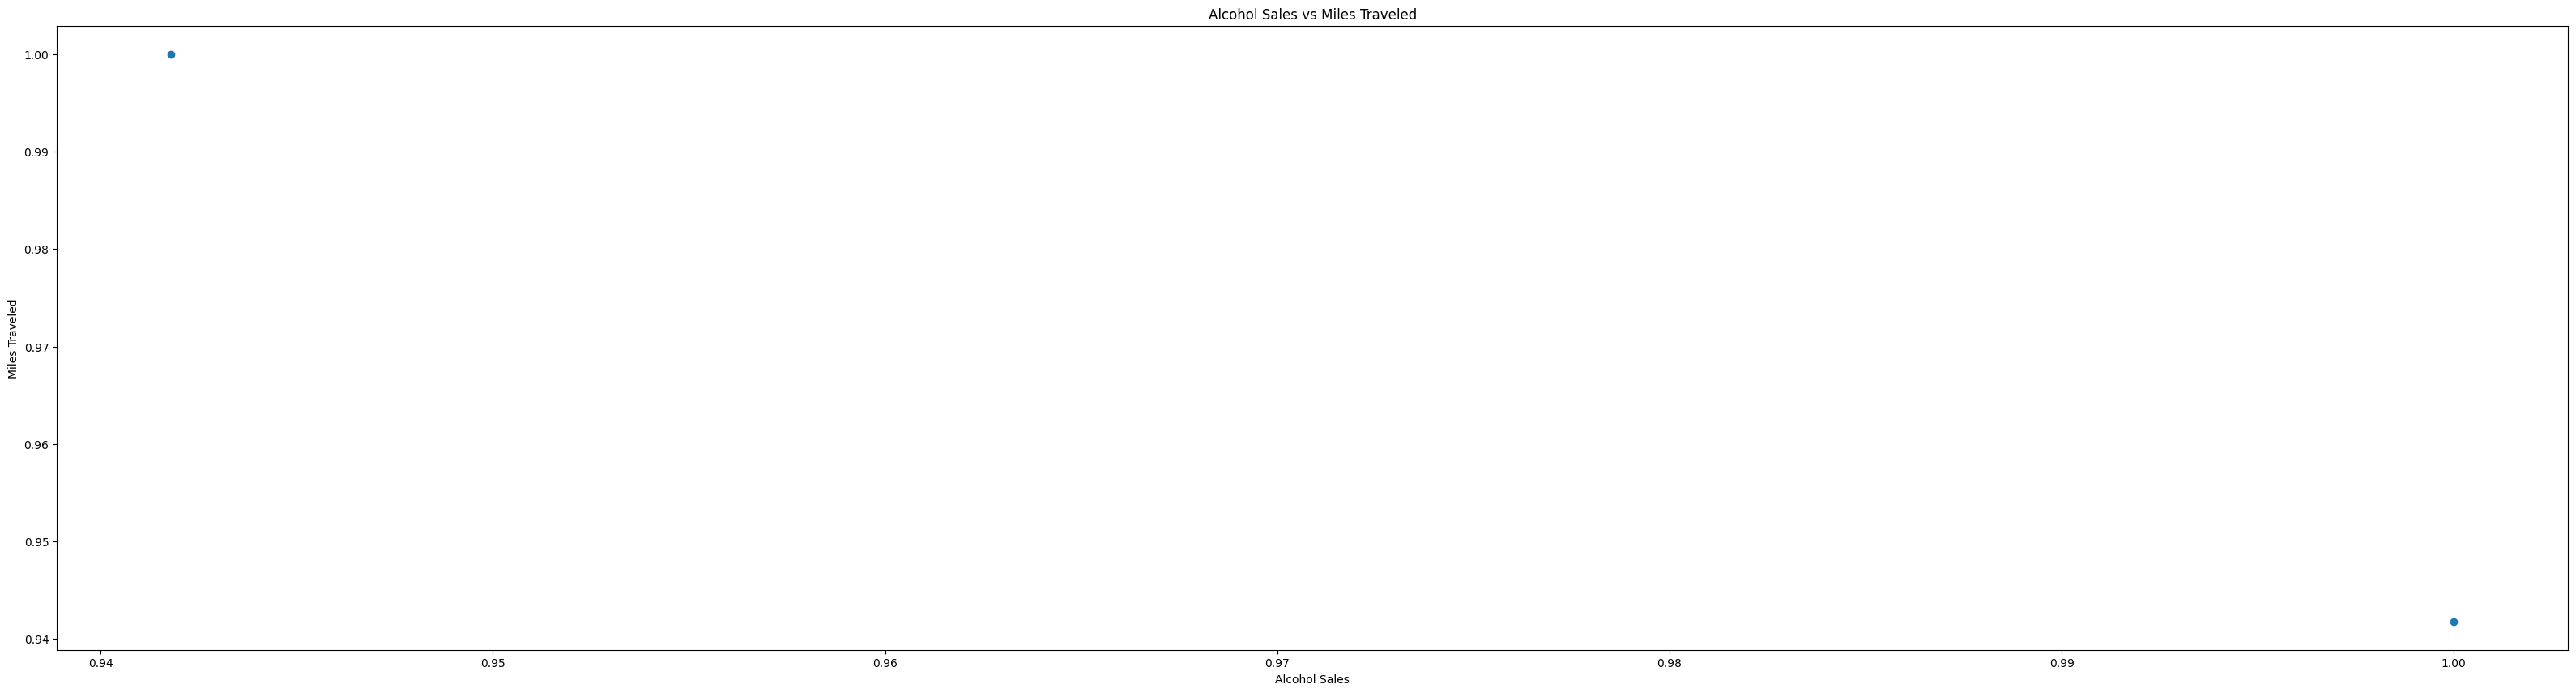

In [13]:
cor=df.corr()
plt.figure(figsize=(40,10))
plt.scatter(cor['ALCOGOL SALES'],cor['VEHICLE MILES TRAVELED'])
plt.title('Alcohol Sales vs Miles Traveled')
plt.xlabel('Alcohol Sales')
plt.ylabel('Miles Traveled')
plt.show()


ARIMA RMSE: 1711.0771844293804


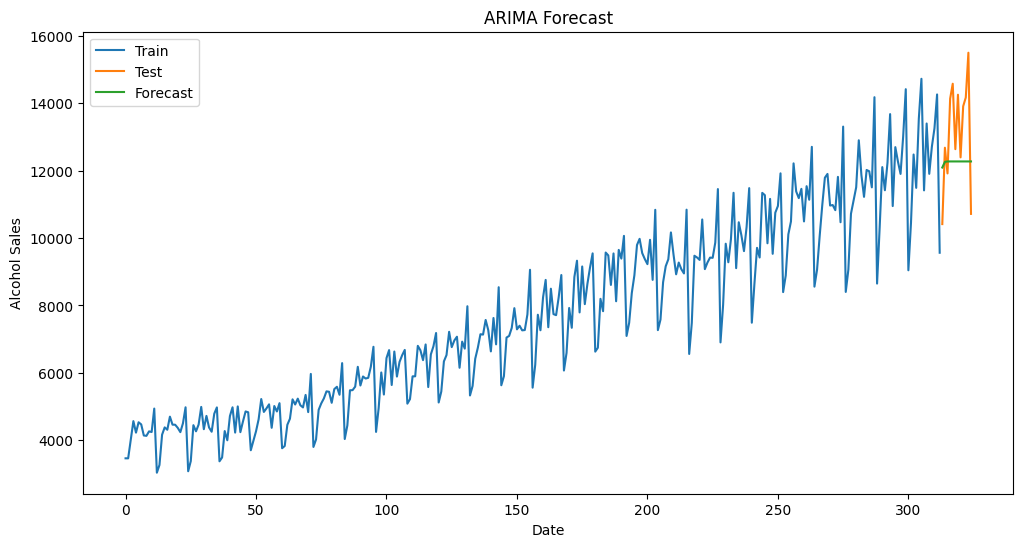

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

train = alcohol_sales[:-12]
test = alcohol_sales[-12:]

model = ARIMA(train['ALCOGOL SALES'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
rmse = np.sqrt(mean_squared_error(test['ALCOGOL SALES'], forecast))
print(f'ARIMA RMSE: {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['ALCOGOL SALES'], label='Train')
plt.plot(test.index, test['ALCOGOL SALES'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Alcohol Sales')
plt.legend()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1uhgtd6/sbzz6fo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm1uhgtd6/ltiw2zq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79249', 'data', 'file=/tmp/tmpm1uhgtd6/sbzz6fo_.json', 'init=/tmp/tmpm1uhgtd6/ltiw2zq9.json', 'output', 'file=/tmp/tmpm1uhgtd6/prophet_model5kvhm6a2/prophet_model-20240721064417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MAE: 8027.948470859112


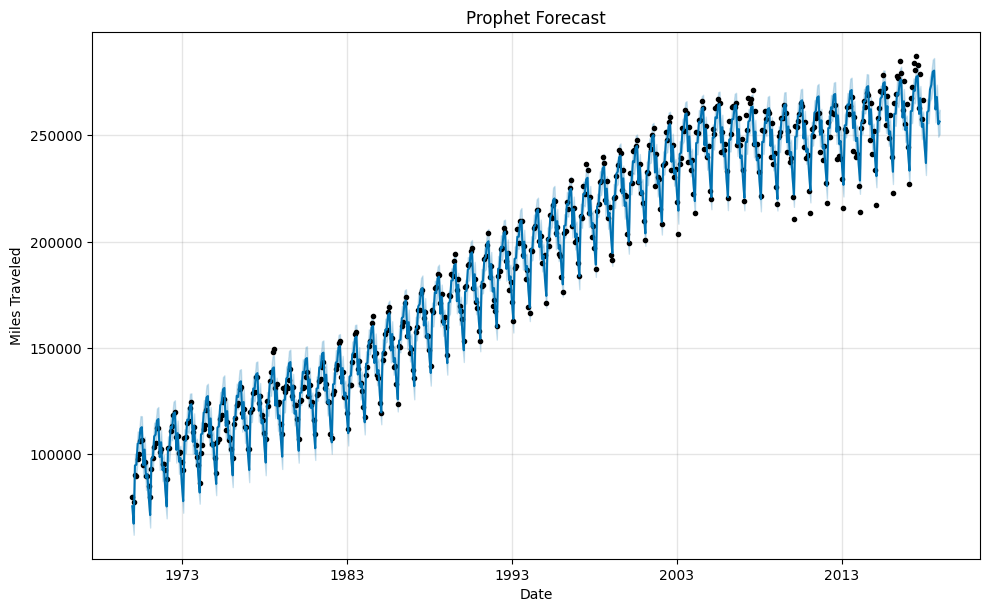

In [15]:
from prophet import Prophet

miles_traveled_prophet = miles_traveled.reset_index().rename(columns={'DATE': 'ds', 'VEHICLE MILES TRAVELED': 'y'})

train_prophet = miles_traveled_prophet[:-12]
test_prophet = miles_traveled_prophet[-12:]

model = Prophet()
model.fit(train_prophet)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

forecast_values = forecast['yhat'][-12:].values
mae = np.mean(np.abs(test_prophet['y'].values - forecast_values))
print(f'Prophet MAE: {mae}')

model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Miles Traveled')
plt.show()
